In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
data_dir = 'C:/Users/Windows10/Desktop/코딩/data/jena_climate_2009_2016.csv'

In [3]:
df = pd.read_csv(data_dir)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [5]:
print(df.columns)

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')


([<matplotlib.axis.YTick at 0x20f9e086f70>,
 [Text(0, 0, 'Date Time'),
  Text(0, 1, 'p (mbar)'),
  Text(0, 2, 'T (degC)'),
  Text(0, 3, 'Tpot (K)'),
  Text(0, 4, 'Tdew (degC)'),
  Text(0, 5, 'rh (%)'),
  Text(0, 6, 'VPmax (mbar)'),
  Text(0, 7, 'VPact (mbar)'),
  Text(0, 8, 'VPdef (mbar)'),
  Text(0, 9, 'sh (g/kg)'),
  Text(0, 10, 'H2OC (mmol/mol)'),
  Text(0, 11, 'rho (g/m**3)'),
  Text(0, 12, 'wv (m/s)'),
  Text(0, 13, 'max. wv (m/s)'),
  Text(0, 14, 'wd (deg)')])

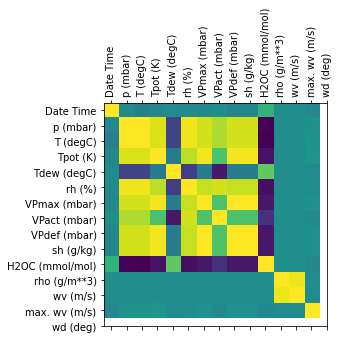

In [6]:
plt.matshow(df.corr())
plt.xticks(range(df.shape[1]), df.columns, rotation = 90)
plt.yticks(range(df.shape[1]), df.columns)


In [8]:
df_dropped = df.drop(['Tdew (degC)', 'H2OC (mmol/mol)', 'rho (g/m**3)'], axis = 1)

In [12]:
df_dropped = df_dropped.set_index(df['Date Time'])
df_dropped = df_dropped.drop('Date Time', axis = 1)
df_dropped

,p (mbar),T (degC),Tpot (K),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,93.30,3.33,3.11,0.22,1.94,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,93.40,3.23,3.02,0.21,1.89,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,93.90,3.21,3.01,0.20,1.88,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,94.20,3.26,3.07,0.19,1.92,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,94.10,3.27,3.08,0.19,1.92,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,269.10,73.10,4.52,3.30,1.22,2.06,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-3.35,269.81,69.71,4.77,3.32,1.44,2.07,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-3.16,270.01,67.91,4.84,3.28,1.55,2.05,1.08,2.00,215.2


In [14]:
df_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
wv (m/s),420551.0,1.702224,65.446714,-9999.00,0.99,1.76,2.86,28.49
max. wv (m/s),420551.0,3.056555,69.016932,-9999.00,1.76,2.96,4.74,23.50


In [16]:
df_dropped['wv (m/s)'] = df_dropped['wv (m/s)'].replace(-9999.0, 0.0)
df_dropped['max. wv (m/s)'] = df_dropped['max. wv (m/s)'].replace(-9999.0, 0.0)

df_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
wv (m/s),420551.0,2.130191,1.542334,0.00,0.99,1.76,2.86,28.49
max. wv (m/s),420551.0,3.532074,2.340482,0.00,1.76,2.96,4.74,23.50


In [17]:
split = int(df_dropped.shape[0]*0.7)

train_data = df_dropped.iloc[:split]
test_data = df_dropped.iloc[split:]

In [18]:
class preprocessing:
    def __init__(self):
        self.min = min
        self.max = max
        self.mean = mean
        self.std = std

    def normalization(data):
        mean = data.mean(axis = 0)
        std = data.std(axis = 0)
        return (data - mean) / std

    def MinMaxscaler(data):
        min = data.min(axis = 0)
        max = data.max(axis = 0)
        return (data - min) / (max - min)

In [19]:
train_scaled = preprocessing.MinMaxscaler(train_data)

In [20]:
train_scaled

,p (mbar),T (degC),Tpot (K),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,
01.01.2009 00:10:00,0.835550,0.254629,0.248031,0.923033,0.040985,0.084272,0.005223,0.081679,0.070403,0.074468,0.423056
01.01.2009 00:20:00,0.836054,0.248004,0.241495,0.924182,0.039263,0.081003,0.004986,0.078843,0.049214,0.063830,0.378056
01.01.2009 00:30:00,0.835651,0.246305,0.239819,0.929925,0.038919,0.080639,0.004748,0.078276,0.012987,0.026809,0.476667
01.01.2009 00:40:00,0.835449,0.249703,0.243338,0.933372,0.039780,0.082819,0.004511,0.080545,0.023240,0.021277,0.550000
01.01.2009 00:50:00,0.835449,0.250382,0.243841,0.932223,0.039952,0.083182,0.004511,0.080545,0.021873,0.026809,0.595278
...,...,...,...,...,...,...,...,...,...,...,...
05.08.2014 01:40:00,0.771665,0.638356,0.635830,0.940264,0.269675,0.543407,0.020418,0.536018,0.123718,0.108936,0.644722
05.08.2014 01:50:00,0.773982,0.637676,0.634825,0.949454,0.268986,0.546676,0.017331,0.539421,0.121668,0.122553,0.640278
05.08.2014 02:00:00,0.775091,0.635128,0.632143,0.951752,0.266230,0.542317,0.016382,0.534884,0.175666,0.141277,0.693333


In [21]:
train_data = train_scaled.iloc[:int(train_scaled.shape[0] * 0.7)]
val_data = train_scaled.iloc[int(train_scaled.shape[0] * 0.7):]

In [ ]:
window_size = 720
